Import relevant libraries

In [14]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from keras.datasets import mnist
from numpy import reshape
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load MNIST Dataset

In [15]:
# Load MNIST Dataset

(x_train, y_train), (_, _) = mnist.load_data()
print(type(x_train))
print(x_train.shape)
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
print(x_mnist.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000, 784)


Create a Sparse random projection for two components

In [16]:
# Sparse random projection on 2 components
import time
srp = SparseRandomProjection(n_components=2)
tic = time.perf_counter()
z = srp.fit_transform(x_mnist)
toc = time.perf_counter()
print(toc - tic)

df_srp = pd.DataFrame()
df_srp["y"] = y_train
df_srp["comp-1"] = z[:, 0]
df_srp["comp-2"] = z[:, 1]


0.899425736000012


Create a PCA projection for two components

In [17]:
# PCA prejection on 2 components
pca = PCA(n_components=2)
tic = time.perf_counter()
z = pca.fit_transform(x_mnist)
toc = time.perf_counter()
print(toc - tic)

df_pca = pd.DataFrame()
df_pca["y"] = y_train
df_pca["comp-1"] = z[:, 0]
df_pca["comp-2"] = z[:, 1]


3.8241645869999275


plot the resulting Sparse random projection

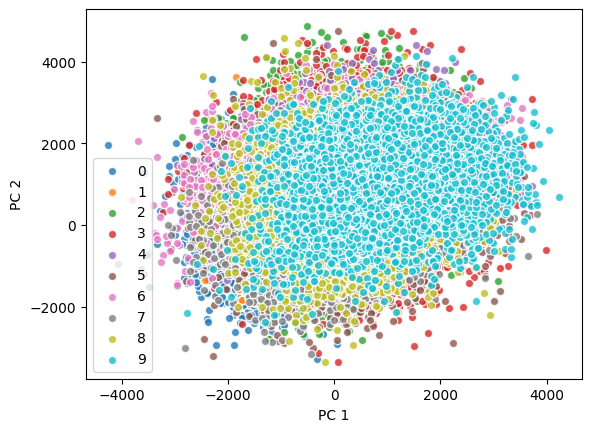

In [18]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers) :
  temporary = df_srp[df_srp["y"]==l]
  plt.scatter(temporary["comp-1"], temporary["comp-2"], c=c, label=l, marker=m, alpha=0.8, edgecolors='white')
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
  plt.savefig('test.png')

Create a Gaussian random projection for two components

In [19]:
# Gaussian random projection on 2 components
grp = GaussianRandomProjection(n_components=2)
z = grp.fit_transform(x_mnist)
df_grp = pd.DataFrame()
df_grp["y"] = y_train
df_grp["comp-1"] = z[:, 0]
df_grp["comp-2"] = z[:, 1]

plot the resulting gaussian random projection

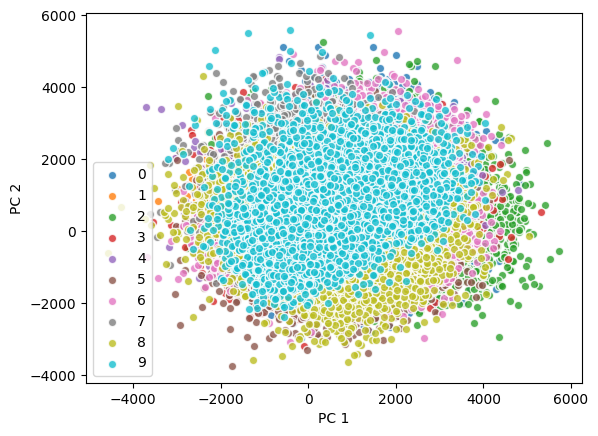

In [20]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers) :
  temporary = df_grp[df_grp["y"]==l]
  plt.scatter(temporary["comp-1"], temporary["comp-2"], c=c, label=l, marker=m, alpha=0.8, edgecolors='white')
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
  plt.savefig('test.png')

Transform the data using GaussianRandomProjection, then apply the inverse transform

In [21]:
# configuring the parameteres for Gaussian random projection
# the number of components
from sklearn.preprocessing import StandardScaler

data_List = []
x_projected =  []

x_mnist = StandardScaler().fit_transform(x_mnist)


#dims=[2, 49, 175, 196, 392]
dims=[2, 50, 175, 500, 28*28]

for i in dims:
  grp = GaussianRandomProjection(n_components=i)
  z = grp.fit_transform(x_mnist)
  x_projected.append(grp.inverse_transform(z))

Determine loss for Gaussian random projection

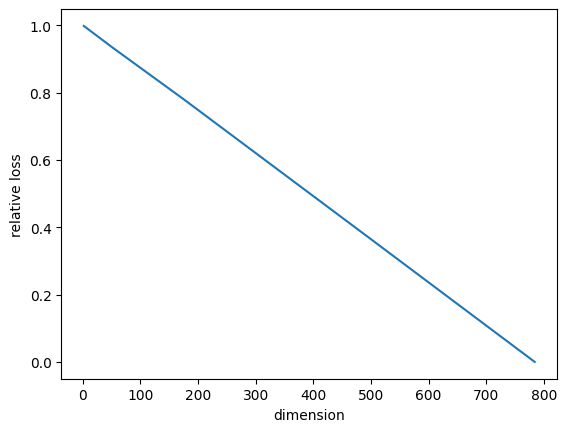

In [22]:
from re import I

norm_sample_data = np.sum((x_mnist) ** 2, axis=1).mean()
losses= []
relativ_losses = []

for i in range(0,len(dims)):
  loss = np.sum((x_mnist - x_projected[i]) ** 2, axis=1).mean()
  relative_loss = loss/norm_sample_data
  losses.append(loss)
  relativ_losses.append(relative_loss)

plt.xlabel("dimension")
plt.ylabel("relative loss")
plt.plot(dims, relativ_losses)

fig = plt
fig.savefig("relation between dimension and relative loss")


Plot the reconstructed picture for Gaussian random projection using different reduction levels

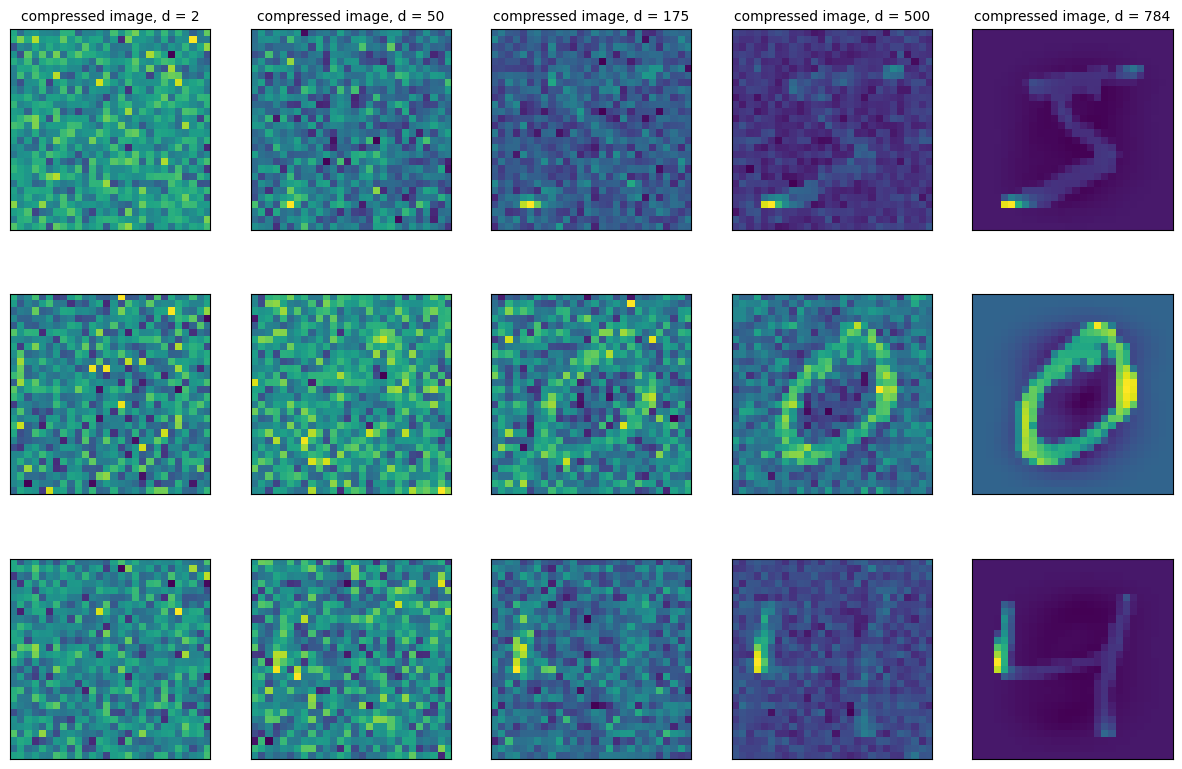

In [23]:
arrayList_dimensions = []
arrayList_orig = []

arr_orig = np.zeros(shape =(28,28))
arr_reduced = np.zeros(shape =(28,28))

for i in range(0,3):
  arr_orig = np.reshape(x_mnist[i], (28,28))
  arrayList_orig.append(arr_orig)

for j in range(0, len(dims)):
  arrayList_reduced = []
  for i in range(0,3):
    arr_reduced = np.reshape(x_projected[j][i], (28,28))
    arrayList_reduced.append(arr_reduced)
  arrayList_dimensions.append(arrayList_reduced)


fig,axs = plt.subplots(3,5,figsize=(15,10))
axs[0,4].set_title("original image", fontsize=10)

for j in range(0,len(dims)):
  axs[0,j].set_title("compressed image, d = " + str(dims[j]), fontsize=10)
  for i in range(0,3):
    axs[i,4].imshow(arrayList_orig[i])
    axs[i,4].set_xticks([])
    axs[i,4].set_yticks([])
    axs[i,j].imshow(arrayList_dimensions[j][i])
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])


plt.subplots_adjust(wspace=0.2, hspace=0.1)

fig.savefig("original_vs_compressed")

#X_projected = np.reshape(X_projected, 15000, (28,28))

Transform the data using SparseRandomProjection, then apply the inverse transform

In [24]:
# configuring the parameteres for Sparse random projection
# the number of components

data_List = []
x_projected =  []

#dims=[2, 49, 175, 196, 392]
dims=[2, 50, 175, 500, 28*28]
for i in dims:
  srp.n_components = i
  z = srp.fit_transform(x_mnist)
  x_projected.append(srp.inverse_transform(z))

Determine the loss for Sparse random projection

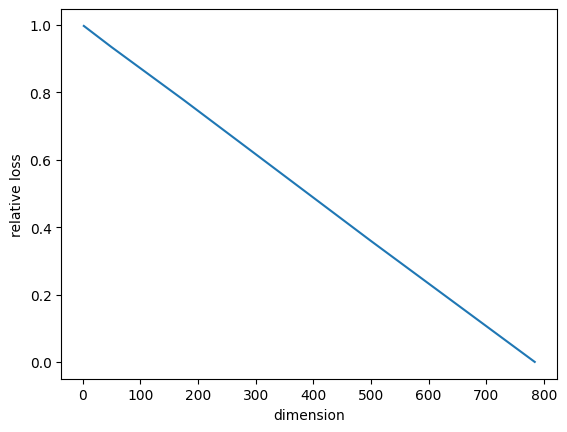

In [25]:
from re import I

norm_sample_data = np.sum((x_mnist) ** 2, axis=1).mean()
losses= []
relativ_losses = []

for i in range(0,len(dims)):
  loss = np.sum((x_mnist - x_projected[i]) ** 2, axis=1).mean()
  relative_loss = loss/norm_sample_data
  losses.append(loss)
  relativ_losses.append(relative_loss)

plt.xlabel("dimension")
plt.ylabel("relative loss")
plt.plot(dims, relativ_losses)

fig = plt
fig.savefig("relation between dimension and relative loss")


Plot the reconstructed picture for Sparse Random Projection using different reduction levels

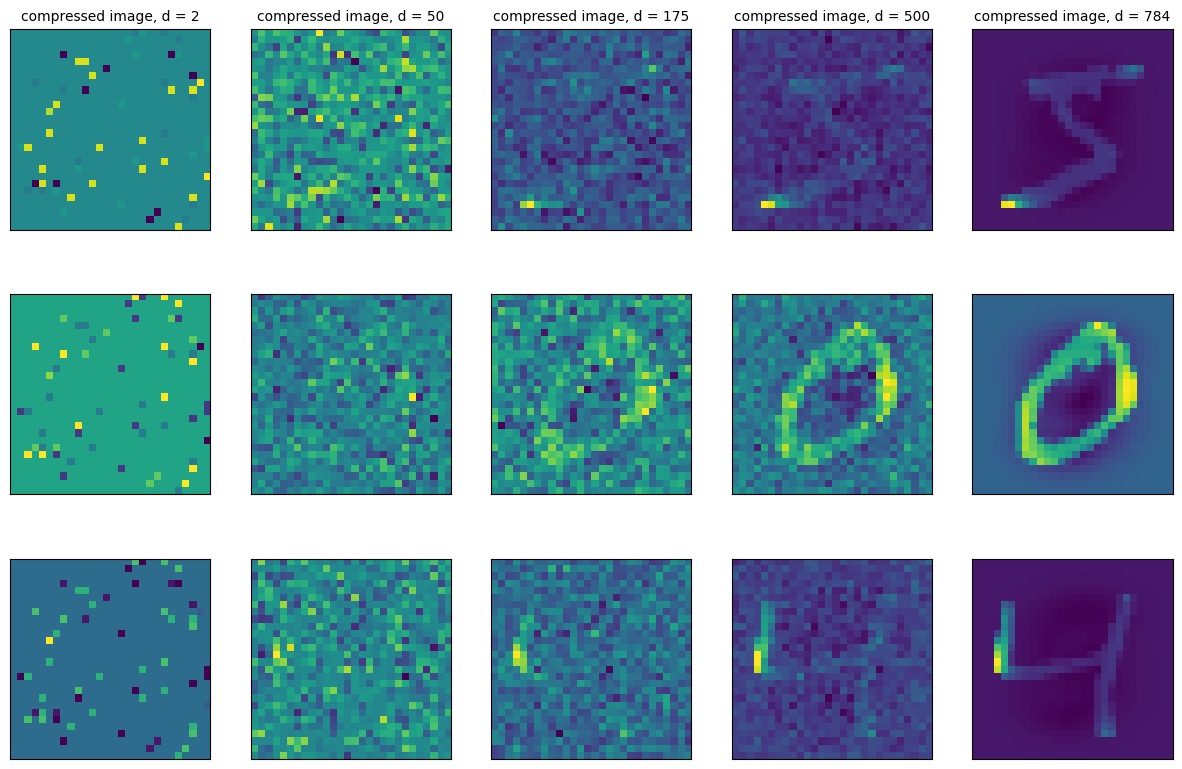

In [26]:
# plot result for sparse random projection

arrayList_dimensions = []
arrayList_orig = []

arr_orig = np.zeros(shape =(28,28))
arr_reduced = np.zeros(shape =(28,28))

for i in range(0,3):
  arr_orig = np.reshape(x_mnist[i], (28,28))
  arrayList_orig.append(arr_orig)

for j in range(0, len(dims)):
  arrayList_reduced = []
  for i in range(0,3):
    arr_reduced = np.reshape(x_projected[j][i], (28,28))
    arrayList_reduced.append(arr_reduced)
  arrayList_dimensions.append(arrayList_reduced)


fig,axs = plt.subplots(3,5,figsize=(15,10))
axs[0,4].set_title("original image", fontsize=10)

for j in range(0,len(dims)):
  axs[0,j].set_title("compressed image, d = " + str(dims[j]), fontsize=10)
  for i in range(0,3):
    axs[i,4].imshow(arrayList_orig[i])
    axs[i,4].set_xticks([])
    axs[i,4].set_yticks([])
    axs[i,j].imshow(arrayList_dimensions[j][i])
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])


plt.subplots_adjust(wspace=0.2, hspace=0.1)

fig.savefig("original_vs_compressed")